# The Spark Foundation 

## Data Science and Business Analytics Intern

### Task 2: Prediction using UnSupervise Machine Learning

### Coder: Aditya Tyagi

#### Importing all libraries required for this Task

In [1]:
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Data from CSV File

In [2]:
data  = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Plotting Data Points

C:\Users\tyagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

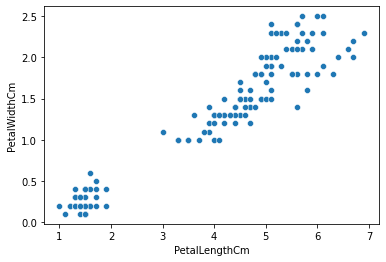

In [4]:
sns.scatterplot(data.PetalLengthCm ,data.PetalWidthCm)

#### Finding optimum number of clusters for K Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
x = data.iloc[:, [1, 2, 3, 4]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\tyagi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


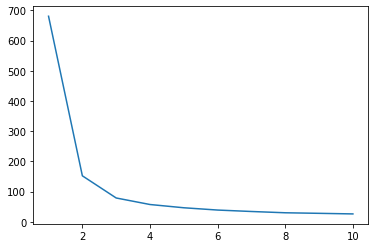

In [7]:
num_cluster = range(1,11)
plt.plot(num_cluster,wcss)

#### Ploting All Predicted Clusters

In [8]:
kmeans = KMeans(3)

In [9]:
y_pred = kmeans.fit_predict(x)

In [10]:
data.drop('Id',axis=1,inplace=True)

In [11]:
data['Cluster'] = y_pred

In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


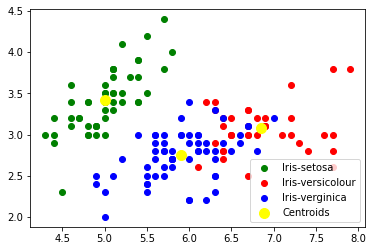

In [13]:
df1 = data[data.Cluster==0]
df2 = data[data.Cluster==1]
df3 = data[data.Cluster==2]

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color='green',label = 'Iris-setosa')
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color='red',label = 'Iris-versicolour')
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,color='blue',label = 'Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

